Mean Squared Error of Train 69343982519.19083
Mean Squared Error of Test 66871922012.83494


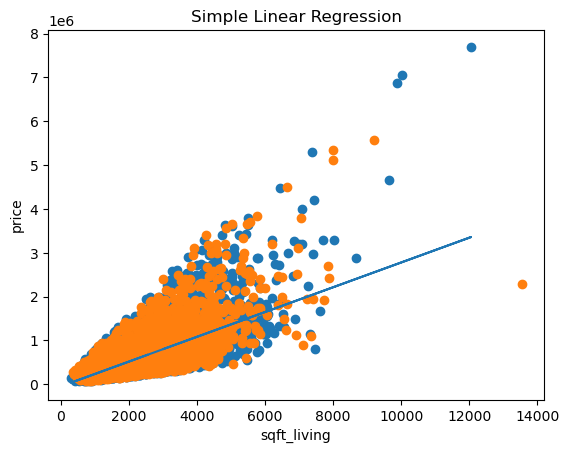

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('House_price_prediction.csv')

def simple_regression(df):
    X_train, X_test, y_train, y_test = train_test_split(df[['sqft_living']], df['price'], test_size=0.4)

    model = LinearRegression().fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print('Mean Squared Error of Train', mse_train)
    print('Mean Squared Error of Test', mse_test)

    plt.scatter(X_train, y_train, label='Training Set')
    plt.scatter(X_test, y_test, label='Testing Set')
    plt.plot(X_train, y_pred_train, label='Regression')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('Simple Linear Regression')
    plt.show()

simple_regression(df)

Multiple Linear Regression
Mean Squared Error: 59133401019.852806


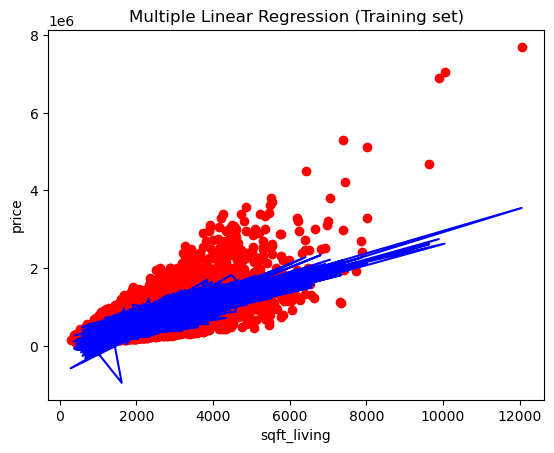

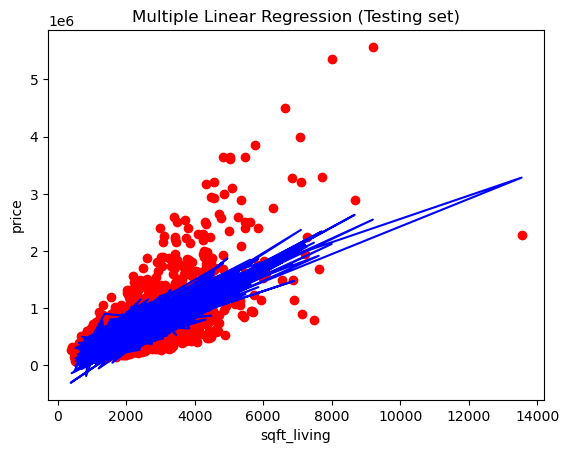

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Multiple Linear Regression
def multiple_linear_regression(data):
    # Selecting multiple independent variables
    X = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'yr_built']]
    y = data['price']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Multiple Linear Regression")
    print("Mean Squared Error:", mse)
    
    # Plotting the regression line for the training set
    plt.scatter(X_train['sqft_living'], y_train, color='red')
    plt.plot(X_train['sqft_living'], model.predict(X_train), color='blue')
    plt.title('Multiple Linear Regression (Training set)')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.show()

    # Plotting the regression line for the testing set
    plt.scatter(X_test['sqft_living'], y_test, color='red')
    plt.plot(X_test['sqft_living'], model.predict(X_test), color='blue')
    plt.title('Multiple Linear Regression (Testing set)')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.show()

multiple_linear_regression(data)


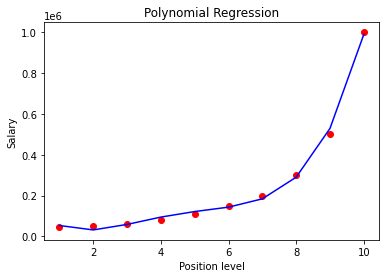

Predicted Salary for Position Level 6.5: $158862.45265152561
Mean Squared Error: 578041645.607252


In [20]:
#SET-A - Q2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
data = pd.read_csv("Position_Salaries.csv")

X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


position_level = 6.5
salary_pred = lin_reg.predict(poly_reg.fit_transform([[position_level]]))
print("Predicted Salary for Position Level {}: ${}".format(position_level, salary_pred[0]))

y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
pip i

C:\Users\smoha\AppData\Local\Temp\ipykernel_8884\473605224.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)  # Create a finer grid of points


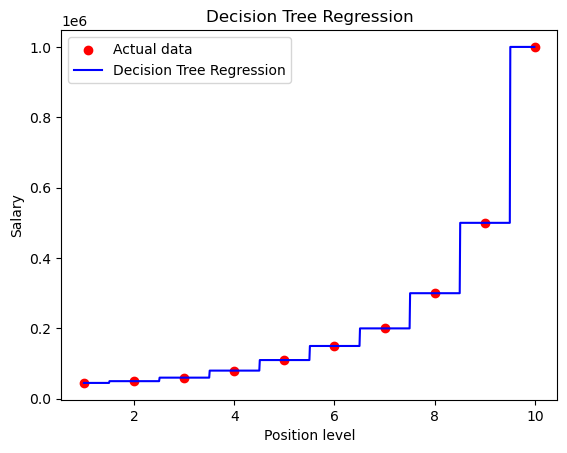

In [3]:
#SET-A - Q3-A

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separate features (X) and target variable (y)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Decision Tree Regression model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Visualize the Decision Tree Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)  # Create a finer grid of points
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Decision Tree Regression')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


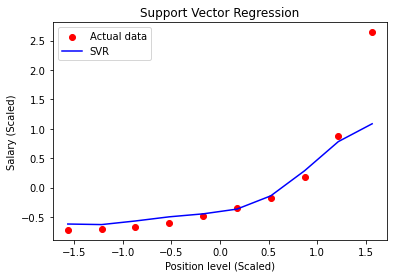

In [22]:
#SET-A - Q3-B

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separate features (X) and target variable (y)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1)).reshape(-1)

# SVR model
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Visualize the SVR results
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, regressor.predict(X), color='blue', label='SVR')
plt.title('Support Vector Regression')
plt.xlabel('Position level (Scaled)')
plt.ylabel('Salary (Scaled)')
plt.legend()
plt.show()

In [23]:
#SET-B - Q1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("HoursScores.csv")


def simple_linear_regression(data):
    X = data[['Hours']]
    y = data['Scores']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Simple Linear Regression")
    print("Mean Squared Error:", mse)
    
simple_linear_regression(data)

Simple Linear Regression
Mean Squared Error: 18.943211722315272


In [24]:
#SET-B - Q2

data = pd.read_csv("50_Startups_dataset.csv")
# Multiple Linear Regression
def multiple_linear_regression(data):
    # Selecting multiple independent variables
    X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
    y = data['Profit']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Multiple Linear Regression")
    print("Mean Squared Error:", mse)

multiple_linear_regression(data)


Multiple Linear Regression
Mean Squared Error: 80926321.22295167


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


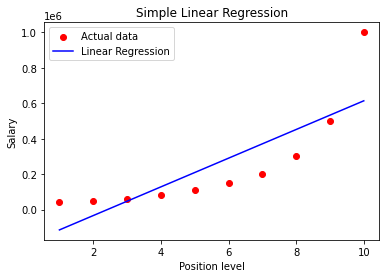

In [25]:
#SET-B - Q3-A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:2].values  # Independent variable (Level)
y = data.iloc[:, 2].values    # Dependent variable (Salary)

# Step 2: Perform simple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Step 3: Visualize the results
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, regressor.predict(X), color='blue', label='Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()


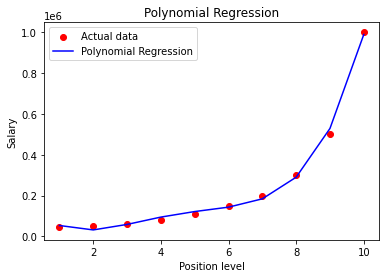

In [26]:
#SET-B - Q3-B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:2].values  # Independent variable (Level)
y = data.iloc[:, 2].values    # Dependent variable (Salary)

# Step 2: Perform polynomial regression
poly_reg = PolynomialFeatures(degree=4)  # You can adjust the degree as needed
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Step 3: Visualize the results
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()
